# Model Training
Die Daten werden geladen, vorverarbeitet und trainiert

### Allgemeines Setup

In [37]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model
from sklearn.ensemble import GradientBoostingClassifier
## for explainer
from lime import lime_tabular
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef, confusion_matrix, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score


## 1.1 Duration und alle Events

##### 1.2 Lade die Sessions

In [3]:
df_count = pd.read_pickle('../resources/SortedBySessions.pkl')

Hier wird ein neues Dataframe kreiert mit der unten gezeigten Struktur.

In [4]:
columns_of_interest = ["count_mouseover", "count_mouseout", "count_click", "count_blur", "count_focus", "count_keydown"]
df_count["total_counts"] = df_count[columns_of_interest].sum(axis=1)
df_count = df_count.drop(["count_mouseover", "count_mouseout", "count_click", "count_blur", "count_focus", "count_keydown", 'height', 'width', 'session'], axis=1)
df_count.head()

,duration,siteName,total_counts
0,136.831,1,159
1,33.249,1,3
2,230.175,1,130
3,20.563,0,19
4,17.076,0,24


Hier werden die 'duration' und 'total_counts' als Merkmale zum Trainieren eingesetzt. Die Zielvariable ist der 'siteName'.

In [6]:
X_count = df_count[['duration', 'total_counts']]
Y_count = df_count['siteName']

X_count = StandardScaler().fit_transform(X_count)

X_count_Train, X_count_Test, Y_count_Train, Y_count_Test = train_test_split(X_count, Y_count, test_size = 0.30, 
                                                    random_state = 101)

##### 1.3 Random Forest
Mit einem n__estimators = 250 und random_state=42 erreicht das Modell, die gleichen Werte wie Duration mit allen types (siehe 2.1). Mit einer höheren Einstellung ist das Modell allerdings noch besser. 

In [7]:
forest_model_count= RandomForestClassifier(n_estimators=1000, random_state=101)
forest_model_count.fit(X_count_Train,Y_count_Train)
y_count_forest_pred=forest_model_count.predict(X_count_Test)

In [8]:
def printEvaluation(Y_session_Test, y_session_pred): 
    print('Accuracy: %.3f' % accuracy_score(Y_session_Test, y_session_pred))
    print('Precision: %.3f' % precision_score(Y_session_Test, y_session_pred))
    print('Recall: %.3f' % recall_score(Y_session_Test, y_session_pred))
    print('Confusion Matrix:', confusion_matrix(Y_session_Test, y_session_pred))
    print('AUC Score: %.3f' % roc_auc_score(Y_session_Test, y_session_pred))
    print('MCC Score: %.3f' % matthews_corrcoef(Y_session_Test, y_session_pred))
    print('F1 Score: %.3f' % f1_score(Y_session_Test, y_session_pred))

printEvaluation(Y_count_Test, y_count_forest_pred)

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
Confusion Matrix: [[15  0]
 [ 0 21]]
AUC Score: 1.000
MCC Score: 1.000
F1 Score: 1.000


##### 1.3 kNN

In [482]:
knn_model_count = KNeighborsClassifier(n_neighbors=3)
knn_model_count.fit(X_count_Train, Y_count_Train)
y_knn_count_pred = knn_model_count.predict(X_count_Test) 
printEvaluation(Y_count_Test, y_count_forest_pred)

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
Confusion Matrix: [[15  0]
 [ 0 21]]
AUC Score: 1.000
MCC Score: 1.000
F1 Score: 1.000


##### 1.4 Logistic Regression


In [483]:
logreg_model_count = LogisticRegression(random_state=16)
logreg_model_count.fit(X_count_Train, Y_count_Train)
y_logreg_pred_count = logreg_model_count.predict(X_count_Test)
printEvaluation(Y_count_Test, y_logreg_pred_count)

Accuracy: 0.833
Precision: 1.000
Recall: 0.714
Confusion Matrix: [[15  0]
 [ 6 15]]
AUC Score: 0.857
MCC Score: 0.714
F1 Score: 0.833


##### 1.5 Support Vector Machine

In [12]:
svm_model_count = svm.SVC(kernel='linear')
svm_model_count.fit(X_count_Train, Y_count_Train)
y_svm_pred_count = svm_model_count.predict(X_count_Test)
printEvaluation(Y_count_Test, y_svm_pred_count)

Accuracy: 0.806
Precision: 1.000
Recall: 0.667
Confusion Matrix: [[15  0]
 [ 7 14]]
AUC Score: 0.833
MCC Score: 0.674
F1 Score: 0.800


##### 1.6 Gradient Boosting

In [10]:
gradient_booster_model_count = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster_model_count.fit(X_count_Train,Y_count_Train)
y_gradient_pred_count = gradient_booster_model_count.predict(X_count_Test)
printEvaluation(Y_count_Test, y_gradient_pred_count)

Accuracy: 0.944
Precision: 0.952
Recall: 0.952
Confusion Matrix: [[14  1]
 [ 1 20]]
AUC Score: 0.943
MCC Score: 0.886
F1 Score: 0.952


# 2.1 Duration und Anzahl der types

In [13]:
df_types = pd.read_pickle('../resources/SortedBySessions.pkl')

In [15]:
df_types.head()

,session,count_mouseover,count_mouseout,count_click,count_blur,count_focus,count_keydown,duration,height,width,siteName
0,515,32,32,14,26,28,27,136.831,1312.0,1479.0,1
1,519,1,0,0,1,1,0,33.249,669.0,390.0,1
2,524,42,42,8,17,16,5,230.175,878.0,1920.0,1
3,528,4,3,0,6,6,0,20.563,1217.0,1440.0,0
4,554,6,6,0,6,6,0,17.076,715.0,414.0,0


##### Anmerkung
In diesem Code werden zunächst alle Types in das Training aufgenommen. Im späteren Verlauf werden sich auf einzelne Types fokussiert, allerdings nicht in diesem Code dargestellt, da dies zu viel Platz verbrauchen würde. Zur Kontrolle können die Types einfach aus den X_types entfernt werden. 

In [16]:
X_types = df_types[['count_mouseover','count_mouseout','count_focus','count_blur', 'count_click','count_keydown', 'duration']]
Y_types = df_types['siteName']

X_types = StandardScaler().fit_transform(X_types)

X_types_Train, X_types_Test, Y_types_Train, Y_types_Test = train_test_split(X_types, Y_types, test_size = 0.30, 
                                                    random_state = 101)

##### 2.2 Random Forest
Hier macht es keinen Unterschied ob man die Parameter n_estimators oder random_state ändert. Das Ergebnis bleibt gleich

In [64]:
forest_model=RandomForestClassifier(n_estimators=250, random_state=42)
forest_model.fit(X_types_Train,Y_types_Train)
y_types_pred=forest_model.predict(X_types_Test)
printEvaluation(Y_types_Test, y_types_pred)

Accuracy: 0.972
Precision: 1.000
Recall: 0.952
Confusion Matrix: [[15  0]
 [ 1 20]]
AUC Score: 0.976
MCC Score: 0.945
F1 Score: 0.976


/Users/ingaglotzbach/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


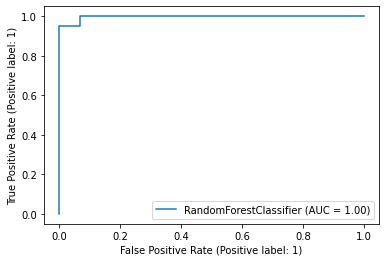

In [23]:
plot_roc_curve(forest_model, X_types_Test, Y_types_Test)
plt.show()

#### Verbessere den Random Forest mit Hyperparameter

In [24]:
rfc_model = RandomForestClassifier()

parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}

In [25]:
from sklearn.model_selection import GridSearchCV
cv_grid = GridSearchCV(rfc_model,parameters,cv=5)
cv_grid.fit(X_types, Y_types.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [26]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [27]:
display(cv_grid)

Best parameters are: {'max_depth': None, 'n_estimators': 50}


0.908 + or -0.049 for the {'max_depth': 2, 'n_estimators': 5}
0.933 + or -0.057 for the {'max_depth': 2, 'n_estimators': 10}
0.908 + or -0.017 for the {'max_depth': 2, 'n_estimators': 50}
0.917 + or -0.026 for the {'max_depth': 2, 'n_estimators': 100}
0.925 + or -0.031 for the {'max_depth': 2, 'n_estimators': 250}
0.925 + or -0.031 for the {'max_depth': 4, 'n_estimators': 5}
0.933 + or -0.05 for the {'max_depth': 4, 'n_estimators': 10}
0.95 + or -0.017 for the {'max_depth': 4, 'n_estimators': 50}
0.967 + or -0.017 for the {'max_depth': 4, 'n_estimators': 100}
0.958 + or -0.026 for the {'max_depth': 4, 'n_estimators': 250}
0.925 + or -0.041 for the {'max_depth': 8, 'n_estimators': 5}
0.95 + or -0.031 for the {'max_depth': 8, 'n_estimators': 10}
0.958 + or -0.0 for the {'max_depth': 8, 'n_estimators': 50}
0.958 + or -0.0 for the {'max_depth': 8, 'n_estimators': 100}
0.967 + or -0.017 for the {'max_depth': 8, 'n_estimators': 2

##### 2.3 kNN

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_types_Train, Y_types_Train)
y_knn_pred_types = knn_model.predict(X_types_Test)
printEvaluation(Y_types_Test, y_knn_pred_types)

Accuracy: 0.972
Precision: 1.000
Recall: 0.952
Confusion Matrix: [[15  0]
 [ 1 20]]
AUC Score: 0.976
MCC Score: 0.945
F1 Score: 0.976


Hier werden die Daten nochmal mit einem MinMaxScaler ausgestattet, allerdings hat dies keine weitere Verbesserung des Modells gebracht. 

In [30]:
scaler = MinMaxScaler()

X_session_robust = df_types[['count_mouseover', 'count_mouseout','count_click','count_blur','count_keydown','count_focus','duration']]
Y_session_robust = df_types['siteName']

X_session_robust = scaler.fit_transform(X_session_robust)

X_session_robust_Train, X_session_robust_Test, Y_session_robust_Train, Y_session_robust_Test = train_test_split(X_session_robust, Y_session_robust, test_size = 0.30, random_state = 101)

knn_robust = KNeighborsClassifier()
knn_robust.fit(X_session_robust_Train, Y_session_robust_Train)
y_knn_pred_robust_types = knn_robust.predict(X_session_robust_Test)
printEvaluation(Y_types_Test, y_knn_pred_robust_types)

Accuracy: 0.972
Precision: 1.000
Recall: 0.952
Confusion Matrix: [[15  0]
 [ 1 20]]
AUC Score: 0.976
MCC Score: 0.945
F1 Score: 0.976


##### 2.4 Linear Discriminat Analysis

In [33]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_types_Train, Y_types_Train)

LinearDiscriminantAnalysis()

In [34]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(lda_model, X_types, Y_types, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores)) 

0.8444444444444443


##### 2.5 Logistic Regression

In [35]:
logreg_model_types = LogisticRegression(random_state=16)
logreg_model_types.fit(X_types_Train, Y_types_Train)
y_logreg_pred_types = logreg_model_types.predict(X_types_Test)
printEvaluation(Y_types_Test, y_logreg_pred_types)

Accuracy: 0.861
Precision: 1.000
Recall: 0.762
Confusion Matrix: [[15  0]
 [ 5 16]]
AUC Score: 0.881
MCC Score: 0.756
F1 Score: 0.865


##### 2.6 Naive Bayes

In [38]:
gnb_model = GaussianNB()
gnb_model.fit(X_types_Train, Y_types_Train)
y_gnb_pred = gnb_model.predict(X_types_Test)
printEvaluation(Y_types_Test, y_gnb_pred)

Accuracy: 0.861
Precision: 0.944
Recall: 0.810
Confusion Matrix: [[14  1]
 [ 4 17]]
AUC Score: 0.871
MCC Score: 0.732
F1 Score: 0.872


##### 2.7 Support Vector Machine

In [39]:
svm_model_types = svm.SVC(kernel='linear') # Linear Kernel
svm_model_types.fit(X_types_Train, Y_types_Train)
y_svm_pred_types = svm_model_types.predict(X_types_Test)
printEvaluation(Y_types_Test, y_svm_pred_types)

Accuracy: 0.861
Precision: 1.000
Recall: 0.762
Confusion Matrix: [[15  0]
 [ 5 16]]
AUC Score: 0.881
MCC Score: 0.756
F1 Score: 0.865


##### 2.8 Gradient Boosting

In [40]:
gradient_booster_model_types = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster_model_types.fit(X_types_Train,Y_types_Train)
y_gradient_pred_types = gradient_booster_model_types.predict(X_types_Test)
printEvaluation(Y_types_Test, y_gradient_pred_types)

Accuracy: 0.944
Precision: 0.952
Recall: 0.952
Confusion Matrix: [[14  1]
 [ 1 20]]
AUC Score: 0.943
MCC Score: 0.886
F1 Score: 0.952


#### 2.9 ANN / Multi-Layer-Perceptron
Es wurde sich auch an einem NN versucht, allerdings konnte hier kein wesentlich besseres Ergebnis als die anderen Modelle erbracht werden.

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import tensorflow as tf

In [42]:
ann_model_types = tf.keras.models.Sequential()
ann_model_types.add(tf.keras.layers.Dense(units=4,activation="relu"))
ann_model_types.add(tf.keras.layers.Dense(units=4,activation="relu"))
ann_model_types.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann_model_types.compile(optimizer="adam",loss="mean_squared_error",metrics=['accuracy'])
ann_model_types.fit(X_types_Train,Y_types_Train,batch_size=32,epochs = 50)

y_ann_pred_types=ann_model_types.predict(X_types_Test)

Epoch 1/50
3/3 [==============================] - 1s 2ms/step - loss: 0.2333 - accuracy: 0.6548
Epoch 2/50
3/3 [==============================] - 0s 2ms/step - loss: 0.2313 - accuracy: 0.6667
Epoch 3/50
3/3 [==============================] - 0s 2ms/step - loss: 0.2293 - accuracy: 0.6667
Epoch 4/50
3/3 [==============================] - 0s 2ms/step - loss: 0.2276 - accuracy: 0.6667
Epoch 5/50
3/3 [==============================] - 0s 2ms/step - loss: 0.2256 - accuracy: 0.6667
Epoch 6/50
3/3 [==============================] - 0s 3ms/step - loss: 0.2236 - accuracy: 0.6905
Epoch 7/50
3/3 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.6905
Epoch 8/50
3/3 [==============================] - 0s 2ms/step - loss: 0.2198 - accuracy: 0.6905
Epoch 9/50
3/3 [==============================] - 0s 3ms/step - loss: 0.2176 - accuracy: 0.6905
Epoch 10/50
3/3 [==============================] - 0s 3ms/step - loss: 0.2154 - accuracy: 0.6905
Epoch 11/50
3/3 [======================

# 3.1 Duration und focus/blur

Hier wird ein neues Dataframe kreiert. Dabei werden alle Events mit focus/blur extrahiert

In [53]:
df_focus = pd.read_pickle('../resources/CleanedDataWithIds.pkl') 
df_focus = df_focus.drop([ 'height', 'width', 'clientX', 'clientY', 'timeStamp' ], axis=1)
df_focus= df_focus.sort_values(by=['date', 'session'], ascending=[True, False])
df_focus = df_focus.loc[(df_focus['type'] == 'focus') | (df_focus['type'] == 'blur')]
df_focus = df_focus.loc[(df_focus['elementId'] != 'window')]

#### 3.2 Dieser Teil gehört zur Sektion 4.1.4.3 (S. 50), da hier bewiesen wird, dass windows die meisten blur Events auslösen

##### 3.2.1 Anzahl der focus/blur Events im ganzen Datensatz ohne window

In [54]:
# Anzahl der focus/blur Events im ganzen Datensatz ohne window
focus_count = df_focus['type'].value_counts()
focus_count.head()

focus    1205
blur     1194
Name: type, dtype: int64

In [55]:
focus_count_einfach = df_focus.loc[(df_focus['siteName'] == 0)]
focus_count_einfach = focus_count_einfach['type'].value_counts()
focus_count_einfach.head()

focus    372
blur     372
Name: type, dtype: int64

In [50]:
focus_count_schwer = df_focus.loc[(df_focus['siteName'] == 1)]
focus_count_schwer = focus_count_schwer['type'].value_counts()
focus_count_schwer.head()

focus    833
blur     822
Name: type, dtype: int64

##### 3.2.2 Anzahl der focus/blur Events im ganzen Datensatz mit window

In [52]:
df_focus_window = pd.read_pickle('../resources/CleanedDataWithIds.pkl') 
df_focus_window = df_focus_window.drop([ 'height', 'width', 'clientX', 'clientY', 'timeStamp' ], axis=1)
df_focus_window= df_focus_window.sort_values(by=['date', 'session'], ascending=[True, False])
df_focus_window = df_focus_window.loc[(df_focus_window['type'] == 'focus') | (df_focus_window['type'] == 'blur')]

In [58]:
# Anzahl der focus/blur Events im ganzen Datensatz mit window
focus_count = df_focus_window['type'].value_counts()
focus_count.head()

blur     1399
focus    1371
Name: type, dtype: int64

In [61]:
focus_count_einfach = df_focus_window.loc[(df_focus_window['siteName'] == 0)]
focus_count_einfach = focus_count_einfach['type'].value_counts()
focus_count_einfach.head()

blur     375
focus    374
Name: type, dtype: int64

In [62]:
focus_count_schwer = df_focus_window.loc[(df_focus_window['siteName'] == 1)]
focus_count_schwer = focus_count_schwer['type'].value_counts()
focus_count_schwer.head()

blur     1024
focus     997
Name: type, dtype: int64

Hier wird das eigentliche Dataframe mit focus/blur gesetzt

In [63]:
df_focus['date'] = pd.to_datetime(df_focus['date'])
df_focus['duration'] = df_focus.groupby(['elementId', 'session'])['date'].diff().dt.total_seconds()
df_result = df_focus.groupby(['siteName', 'session', 'type'])['duration'].agg(['sum', 'size']).reset_index()
df_result = df_result.groupby(['siteName', 'session']).sum()
df_result = df_result.rename(columns={'sum': 'duration', 'size': 'event_count focus/blur'})
df_result = df_result[['event_count focus/blur', 'duration']]
df_result = df_result.reset_index()
df_result.head()

<ipython-input-63-0a0f470e2f5b>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_result = df_result.groupby(['siteName', 'session']).sum()


,siteName,session,event_count focus/blur,duration
0,0,110,14,45.536
1,0,116,2,3.896
2,0,120,6,7.034
3,0,127,14,22.744
4,0,138,12,38.160


Teile in Trainings-/Testdaten

In [74]:
X_focus = df_result[['event_count focus/blur', 'duration']]
Y_focus = df_result['siteName']

X_focus = StandardScaler().fit_transform(X_focus)

X_focus_Train, X_focus_Test, Y_focus_Train, Y_focus_Test = train_test_split(X_focus, Y_focus, test_size = 0.30, 
                                                    random_state = 101)

##### 3.3 Random Forest

In [78]:
forest_focus_model=RandomForestClassifier(n_estimators=250, random_state=42)
forest_focus_model.fit(X_focus_Train,Y_focus_Train)
y_focus_pred=forest_focus_model.predict(X_focus_Test)
printEvaluation(Y_focus_Test, y_focus_pred)

Accuracy: 0.865
Precision: 0.850
Recall: 0.895
Confusion Matrix: [[15  3]
 [ 2 17]]
AUC Score: 0.864
MCC Score: 0.730
F1 Score: 0.872


##### 3.4 kNN

In [80]:
knn_model_focus = KNeighborsClassifier(n_neighbors=3)
knn_model_focus.fit(X_focus_Train, Y_focus_Train)
y_knn_focus_pred = knn_model_focus.predict(X_focus_Test) 
printEvaluation(Y_focus_Test, y_knn_focus_pred)

Accuracy: 0.865
Precision: 0.938
Recall: 0.789
Confusion Matrix: [[17  1]
 [ 4 15]]
AUC Score: 0.867
MCC Score: 0.740
F1 Score: 0.857


##### 3.5 Logistic Regression

In [81]:
logreg_model_focus = LogisticRegression(random_state=16)
logreg_model_focus.fit(X_count_Train, Y_count_Train)
y_logreg_pred_focus = logreg_model_focus.predict(X_focus_Test)
printEvaluation(Y_focus_Test, y_logreg_pred_focus)

Accuracy: 0.838
Precision: 0.933
Recall: 0.737
Confusion Matrix: [[17  1]
 [ 5 14]]
AUC Score: 0.841
MCC Score: 0.694
F1 Score: 0.824


##### 3.6 Support Vector Machine

In [82]:
svm_model_focus = svm.SVC(kernel='linear')
svm_model_focus.fit(X_focus_Train, Y_focus_Train)
y_svm_pred_focus = svm_model_focus.predict(X_focus_Test)
printEvaluation(Y_focus_Test, y_svm_pred_focus)

Accuracy: 0.730
Precision: 1.000
Recall: 0.474
Confusion Matrix: [[18  0]
 [10  9]]
AUC Score: 0.737
MCC Score: 0.552
F1 Score: 0.643


##### 3.7 Gradient Boosting

In [83]:
gradient_booster_model_focus = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster_model_focus.fit(X_focus_Train,Y_focus_Train)
y_gradient_pred_focus = gradient_booster_model_focus.predict(X_focus_Test)
printEvaluation(Y_focus_Test, y_gradient_pred_focus)

Accuracy: 0.865
Precision: 0.850
Recall: 0.895
Confusion Matrix: [[15  3]
 [ 2 17]]
AUC Score: 0.864
MCC Score: 0.730
F1 Score: 0.872


# 4.1 Duration und mouseover/mouseout
Hier wird ein neues Dataframe kreiert. Dabei werden alle Events mit focus/blur extrahiert

In [92]:
df_mouse = pd.read_pickle('../resources/CleanedDataWithIds.pkl') 
df_mouse = df_mouse.drop([ 'height', 'width', 'clientX', 'clientY', 'timeStamp' ], axis=1)
df_mouse = df_mouse.sort_values(by=['date', 'session'], ascending=[True, False])
df_mouse = df_mouse.loc[(df_mouse['type'] == 'mouseover') | (df_mouse['type'] == 'mouseout')]
df_mouse = df_mouse.loc[(df_mouse['elementId'] != 'window')]

df_mouse['date'] = pd.to_datetime(df_mouse['date'])
df_mouse['duration'] = df_mouse.groupby(['elementId', 'session'])['date'].diff().dt.total_seconds()
df_result_mouse = df_mouse.groupby(['siteName', 'session', 'type'])['duration'].agg(['sum', 'size']).reset_index()
df_result_mouse = df_result_mouse.groupby(['siteName', 'session']).sum()
df_result_mouse = df_result_mouse.rename(columns={'sum': 'duration', 'size': 'event_count mouseover/mouseout'})
df_result_mouse = df_result_mouse[['event_count mouseover/mouseout', 'duration']]

df_result_mouse = df_result_mouse.reset_index()
df_result_mouse.head()

<ipython-input-92-601dd8aaee2e>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_result_mouse = df_result_mouse.groupby(['siteName', 'session']).sum()


,siteName,session,event_count mouseover/mouseout,duration
0,0,110,12,45.539
1,0,116,2,3.896
2,0,120,16,8.866
3,0,127,14,22.814
4,0,138,34,144.909


In [93]:
X_mouse = df_result_mouse[['event_count mouseover/mouseout', 'duration']]
Y_mouse = df_result_mouse['siteName']

X_mouse = StandardScaler().fit_transform(X_mouse)

X_mouse_Train, X_mouse_Test, Y_mouse_Train, Y_mouse_Test = train_test_split(X_mouse, Y_mouse, test_size = 0.30, 
                                                    random_state = 101)

##### 4.2 Random Forest

In [96]:
forest_mouse_model=RandomForestClassifier(n_estimators=250, random_state=42)
forest_mouse_model.fit(X_mouse_Train,Y_mouse_Train)
y_mouse_pred=forest_mouse_model.predict(X_mouse_Test)
printEvaluation(Y_mouse_Test, y_mouse_pred)

Accuracy: 0.750
Precision: 0.750
Recall: 0.750
Confusion Matrix: [[15  5]
 [ 5 15]]
AUC Score: 0.750
MCC Score: 0.500
F1 Score: 0.750


##### 4.3 kNN

In [97]:
knn_model_mouse = KNeighborsClassifier(n_neighbors=3)
knn_model_mouse.fit(X_mouse_Train, Y_mouse_Train)
y_knn_mouse_pred = knn_model_mouse.predict(X_mouse_Test) 
printEvaluation(Y_mouse_Test, y_knn_mouse_pred)

Accuracy: 0.825
Precision: 0.882
Recall: 0.750
Confusion Matrix: [[18  2]
 [ 5 15]]
AUC Score: 0.825
MCC Score: 0.657
F1 Score: 0.811


##### 4.4 Logistic Regression

In [98]:
logreg_model_mouse = LogisticRegression(random_state=16)
logreg_model_mouse.fit(X_mouse_Train, Y_mouse_Train)
y_logreg_pred_mouse = logreg_model_focus.predict(X_mouse_Test)
printEvaluation(Y_mouse_Test, y_logreg_pred_mouse)

Accuracy: 0.725
Precision: 0.909
Recall: 0.500
Confusion Matrix: [[19  1]
 [10 10]]
AUC Score: 0.725
MCC Score: 0.504
F1 Score: 0.645


##### 4.5 Support Vector Machine

In [100]:
svm_model_mouse = svm.SVC(kernel='linear')
svm_model_mouse.fit(X_mouse_Train, Y_mouse_Train)
y_svm_pred_mouse = svm_model_mouse.predict(X_mouse_Test)
printEvaluation(Y_mouse_Test, y_svm_pred_mouse)

Accuracy: 0.725
Precision: 1.000
Recall: 0.450
Confusion Matrix: [[20  0]
 [11  9]]
AUC Score: 0.725
MCC Score: 0.539
F1 Score: 0.621


##### 4.6 Gradient Boosting

In [101]:
gradient_booster_model_mouse = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster_model_mouse.fit(X_mouse_Train,Y_mouse_Train)
y_gradient_pred_mouse = gradient_booster_model_mouse.predict(X_mouse_Test)
printEvaluation(Y_mouse_Test, y_gradient_pred_mouse)

Accuracy: 0.775
Precision: 0.762
Recall: 0.800
Confusion Matrix: [[15  5]
 [ 4 16]]
AUC Score: 0.775
MCC Score: 0.551
F1 Score: 0.780


# 5.1 RNN-Versuch
Hier wurde anhand der sequentiellen Daten versucht, valide Ergebnisse zur Klassifikation erbringen. Allerdings hat sich die Accurancy über die Zeit nicht verbessern können, obwohl eine Dropout-Schicht und Regulator mit dabei ist. 

In [103]:
df_seq = pd.read_pickle('../resources/CleanedDataWithIds.pkl') 
df_seq['date'] = df_seq['date'].astype('datetime64[ns]')

Sortiert wurde hierbei anhand des timeStamps und session (Datum nicht, da dieser nicht skaliert ist im Vergleich zum timeStamp)

In [112]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

df_encoded = df_seq.sort_values(by=['session', 'timeStamp'])

In [113]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

le = LabelEncoder()
df_encoded['siteName'] = le.fit_transform(df_encoded['siteName'])


In [114]:
#one-hot-encoding
df_encoded = pd.get_dummies(df_encoded, columns=['type'])

In [115]:
df_encoded.head()

,timeStamp,siteName,clientX,clientY,session,height,width,type_blur,type_click,type_focus,type_keydown,type_mouseout,type_mouseover
18052,587.0,1,1389.0,465.0,102,1279.0,3440.0,0,0,0,0,0,1
18051,605.0,1,1385.0,428.0,102,1279.0,3440.0,0,0,0,0,1,0
18054,704.0,1,1395.0,316.0,102,1279.0,3440.0,0,0,0,0,0,1
18053,755.0,1,1416.0,285.0,102,1279.0,3440.0,0,0,0,0,1,0
18055,1057.0,1,1416.0,286.0,102,1279.0,3440.0,0,0,0,0,0,1


In [116]:
X = df_encoded.drop(['siteName'], axis=1)
y = df_encoded['siteName']

In [117]:
from keras.optimizers import Adam
from sklearn.model_selection import KFold
# define and fit model
from keras import regularizers

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# reshape data for LSTM
X_train = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))


model = Sequential()
model.add(LSTM(64, return_sequences=True, kernel_regularizer=regularizers.l2(0.01), recurrent_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True, kernel_regularizer=regularizers.l2(0.01), recurrent_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with increased number of epochs
model.fit(X_train, y_train, epochs=20, shuffle=False)

Epoch 1/20
222/222 [==============================] - 4s 3ms/step - loss: 4.2209 - accuracy: 0.8198
Epoch 2/20
222/222 [==============================] - 1s 3ms/step - loss: 3.3692 - accuracy: 0.8198
Epoch 3/20
222/222 [==============================] - 1s 3ms/step - loss: 3.0990 - accuracy: 0.8198
Epoch 4/20
222/222 [==============================] - 1s 3ms/step - loss: 2.9312 - accuracy: 0.8198
Epoch 5/20
222/222 [==============================] - 1s 4ms/step - loss: 2.8348 - accuracy: 0.8198
Epoch 6/20
222/222 [==============================] - 1s 3ms/step - loss: 2.7845 - accuracy: 0.8198
Epoch 7/20
222/222 [==============================] - 1s 3ms/step - loss: 2.7612 - accuracy: 0.8198
Epoch 8/20
222/222 [==============================] - 1s 4ms/step - loss: 2.7518 - accuracy: 0.8198
Epoch 9/20
222/222 [==============================] - 1s 3ms/step - loss: 2.7486 - accuracy: 0.8198
Epoch 10/20
222/222 [==============================] - 1s 3ms/step - loss: 2.7476 - accuracy: 0.8198

In [118]:
# evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 2.82584810256958
Test accuracy: 0.8146892786026001
